# PyTorch for CIFAR10
Here we test svm and softmax classifier.
First init some basic environment.

In [46]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# SVM classifier
We create lienar classifier and use margin loss.

In [47]:
import torch.optim as optim
import torch.nn as nn
import time
from cifar10_solver import CIFAR10Solver, plot_history
from classifiers.linear_classifier import LinearClassifier

svm = LinearClassifier(input_shape=(3, 32, 32))
print(svm)
opt = optim.SGD(svm.parameters(), lr=1e-3, momentum=0)
loss_fn = nn.MultiMarginLoss()
solver = CIFAR10Solver(svm, opt, loss_fn)

LinearClassifier(
  (fc): Linear(in_features=3072, out_features=10, bias=True)
)
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
train on device: cuda:0


# train SVM
train the classifier

In [48]:
%%time
history = solver.train(epochs=4, train_batch_size=128)

start training. epoch steps: 352
Epoch: 1/4, lr:1.00e-03
[##################################################] 100.00% loss:0.61 acc:27.92% val_loss:0.55 val_acc:31.10%
Epoch: 2/4, lr:1.00e-03
[##################################################] 100.00% loss:0.55 acc:30.50% val_loss:0.53 val_acc:32.74%
Epoch: 3/4, lr:1.00e-03
[##################################################] 100.00% loss:0.53 acc:31.62% val_loss:0.52 val_acc:34.30%
Epoch: 4/4, lr:1.00e-03
[##################################################] 100.00% loss:0.53 acc:32.07% val_loss:0.52 val_acc:34.02%
end training
CPU times: user 7.21 s, sys: 3.53 s, total: 10.7 s
Wall time: 41.8 s


# plot svm loss history
We check the classifier by plotting the loss and acc.

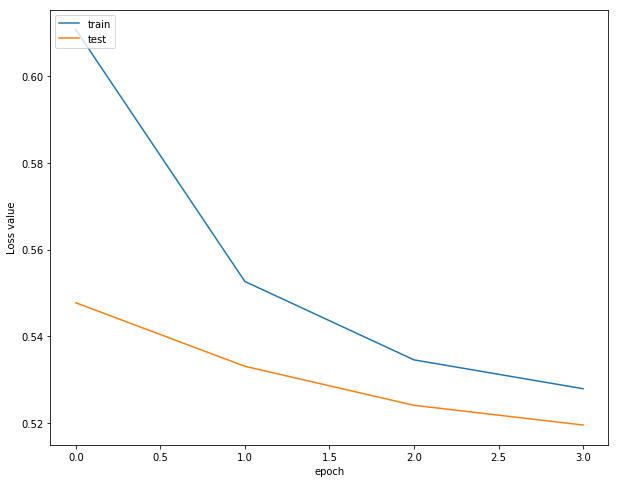

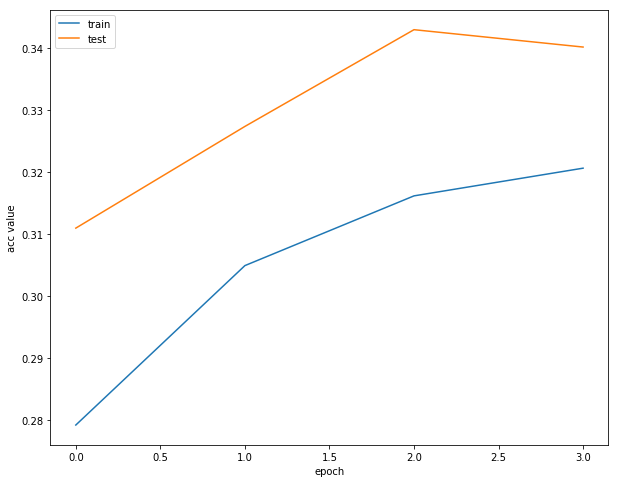

In [49]:
plot_history(history)

# test SVM classifier
test on test data

In [50]:
test_loss, test_acc = solver.test(test_batch_size=128)
print('test_loss:{:.2} test_acc:{:.2%}'.format(test_loss, test_acc))

test_loss:0.52 test_acc:34.02%


# Softmax classifier
Then we create softmax classifier.

In [51]:
softmax = LinearClassifier(input_shape=(3, 32, 32))
print(softmax)
opt = optim.SGD(softmax.parameters(), lr=1e-3, momentum=0)
loss_fn = nn.CrossEntropyLoss()
solver = CIFAR10Solver(softmax, opt, loss_fn)

LinearClassifier(
  (fc): Linear(in_features=3072, out_features=10, bias=True)
)
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
train on device: cuda:0


# train softmax

In [52]:
%%time
history = solver.train(epochs=4, train_batch_size=128)

start training. epoch steps: 352
Epoch: 1/4, lr:1.00e-03
[##################################################] 100.00% loss:2.0 acc:28.60% val_loss:1.9 val_acc:32.24%
Epoch: 2/4, lr:1.00e-03
[##################################################] 100.00% loss:1.9 acc:31.46% val_loss:1.9 val_acc:34.04%
Epoch: 3/4, lr:1.00e-03
[##################################################] 100.00% loss:1.9 acc:32.72% val_loss:1.9 val_acc:35.76%
Epoch: 4/4, lr:1.00e-03
[##################################################] 100.00% loss:1.9 acc:33.44% val_loss:1.9 val_acc:35.58%
end training
CPU times: user 7.31 s, sys: 3.4 s, total: 10.7 s
Wall time: 41.5 s


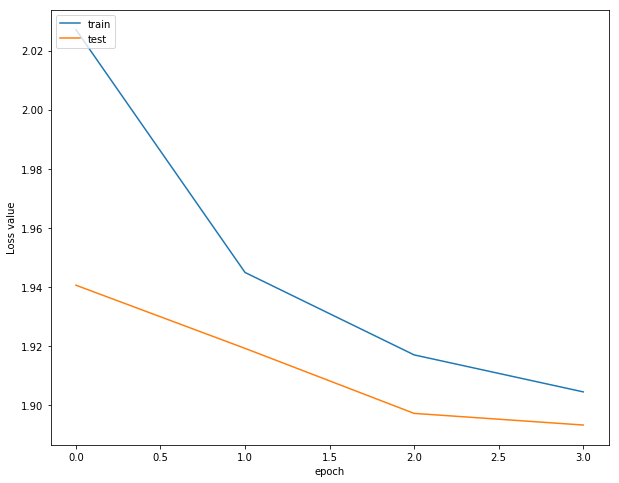

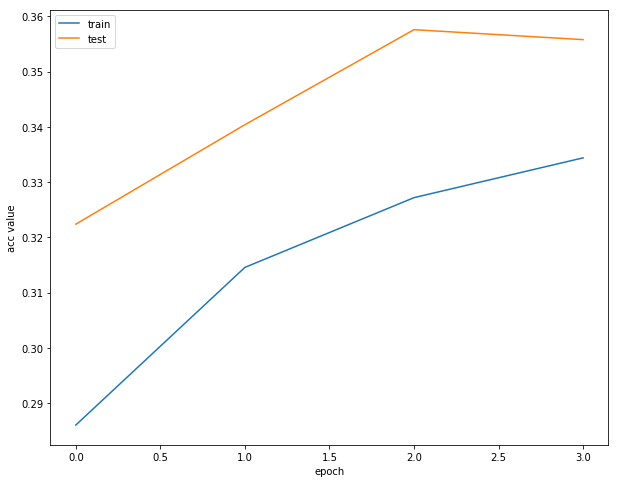

In [53]:
# plot softmax loss history
plot_history(history)

# test softmax classifier
test on test data

In [54]:
test_loss, test_acc = solver.test(test_batch_size=128)
print('test_loss:{:.2} test_acc:{:.2%}'.format(test_loss, test_acc))

test_loss:1.9 test_acc:35.58%
